⚠️ This project is mandatory for certification bloc #2.

![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating with Tinder

## Company's description 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests.

Tinder was launched by Sean Rad at a hackathon held at the Hatch Labs incubator in West Hollywood in 2012.

As of 2021, Tinder has recorded more than 65 billion matches worldwide.

## Project 🚧

The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**. 

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯

Use the dataset to understand what makes people interested into each other to go on a second date together:
* You may use descriptive statistics
* You may use visualisations

## Scope of this project 🖼️

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

[Dataset](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv)

[Dataset Description](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data+Key.doc)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you

Data Exploration Ideas :
* What are the least desirable attributes in a male partner? Does this differ for female partners?
* How important do people think attractiveness is in potential mate selection vs. its real impact?
* Are shared interests more important than a shared racial background?
* Can people accurately predict their own perceived value in the dating market?
* In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

## Deliverable 📬

To complete this project, your team should deliver:

A notebook with:
* descriptive statistics
* visualisations
* captions and interpretations on how the stats and visualisations are relevant to why people agree to a second date

# PROJET TINDER

### Libraries

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### CSV import

In [272]:
df = pd.read_csv("Speed+Dating+Data.csv", encoding="latin1")

### Display settings

In [273]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [274]:
# To standardize the name of columns
df.columns = df.columns.str.strip().str.lower()

## Basic csv analysis

In [275]:
print(df.shape)

(8378, 195)


In [276]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

In [277]:
df.tail()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8373,552,22.0,1,44,2,21,22,14,10.0,5,18,526.0,0,0.64,0,26.0,3.0,10.0,10.0,30.0,20.0,10.0,15.0,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,NaN,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,19,527.0,0,0.71,0,24.0,6.0,50.0,20.0,10.0,5.0,10.0,5.0,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,20,528.0,0,-0.46,0,29.0,3.0,40.0,10.0,30.0,10.0,10.0,NaN,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [279]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

## Statistics on participants

### Number of participants per gender

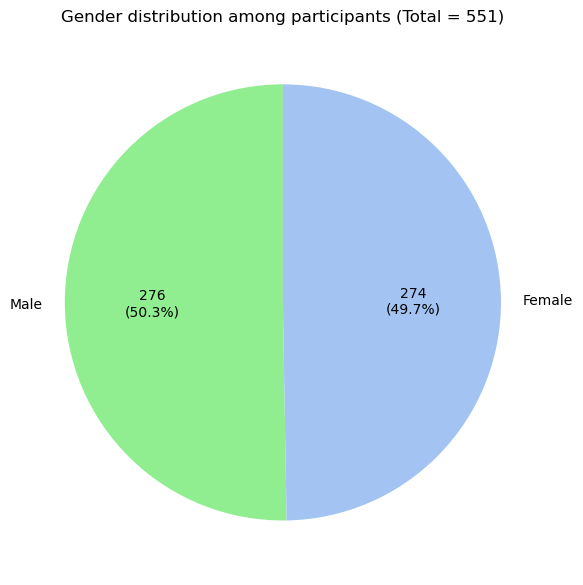

In [280]:
# --- Total number of unique participants
total_participants = df["iid"].nunique()

# --- Distribution by gender (unique participants)
gender_counts = df.drop_duplicates("iid")["gender"].value_counts()

# --- Map numeric gender codes to labels
gender_labels = gender_counts.rename(index={1: "Male", 0: "Female"})

# --- Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_labels,
    labels=gender_labels.index,
    autopct=lambda p: f"{int(p*total_participants/100)}\n({p:.1f}%)",
    startangle=90,
    colors=["#90ee90", "#a3c4f3"]
)
plt.title(f"Gender distribution among participants (Total = {total_participants})")
plt.tight_layout()
plt.show()


### Goals of the participants for the speed dating

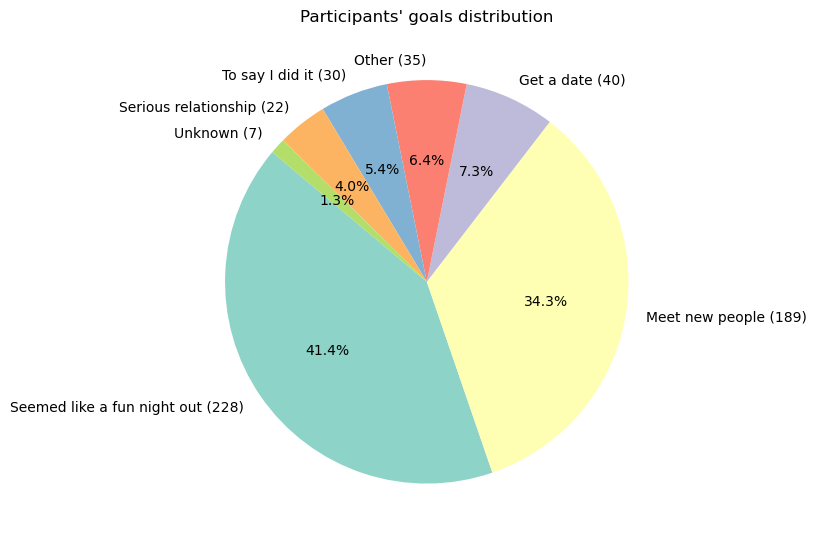

In [281]:
# --- Human-readable labels for goals ---
GOAL_LABELS = {
    1: "Seemed like a fun night out",
    2: "Meet new people",
    3: "Get a date",
    4: "Serious relationship",
    5: "Other",
    6: "To say I did it",
    7: "No particular goal"
}

# Work on one row per participant
participants = df.drop_duplicates("iid").copy()
participants["goal_label"] = participants["goal"].map(GOAL_LABELS).fillna("Unknown")

# Count participants by goal
goal_counts = participants["goal_label"].value_counts().sort_values(ascending=False)

# --- Create labels with counts ---
labels_with_counts = [f"{label} ({count})" for label, count in zip(goal_counts.index, goal_counts.values)]

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    goal_counts,
    labels=labels_with_counts,         # 👈 use labels with counts
    autopct="%1.1f%%",                 # percentage inside the slices
    startangle=140,
    colors=sns.color_palette("Set3", n_colors=len(goal_counts))  # choose palette (Set3 = pastel, tab10 = contrast)
)

plt.title("Participants' goals distribution")
plt.tight_layout()
plt.show()


### Participants' Race Analysis

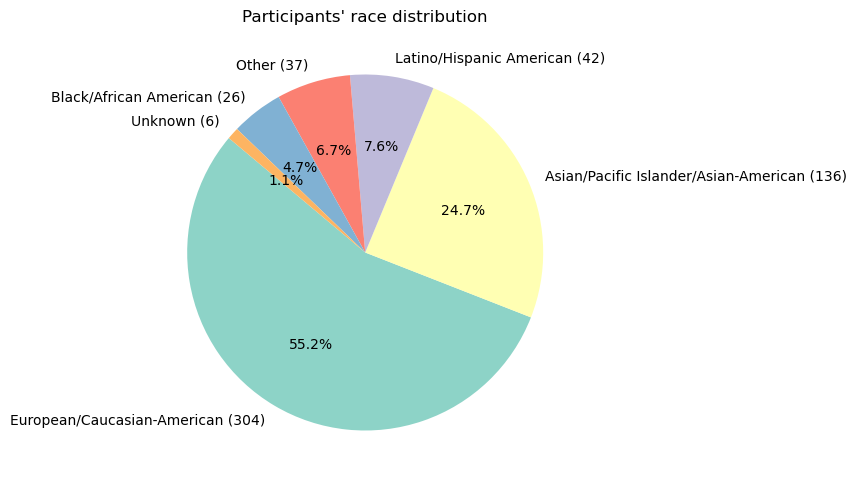

In [282]:
# --- Human-readable labels for race codes ---
RACE_LABELS = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander/Asian-American",
    5: "Native American",
    6: "Other"
}

# Work on one row per participant
participants = df.drop_duplicates("iid").copy()
participants["race_label"] = participants["race"].map(RACE_LABELS).fillna("Unknown")

# Count participants by race
race_counts = participants["race_label"].value_counts().sort_values(ascending=False)

# --- Labels with counts ---
labels_with_counts = [f"{label} ({count})" for label, count in zip(race_counts.index, race_counts.values)]

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    race_counts,
    labels=labels_with_counts,
    autopct="%1.1f%%",   # show percentage inside slices
    startangle=140,
    colors=sns.color_palette("Set3", n_colors=len(race_counts))  # Set2 = distinct pastel colors
)

plt.title("Participants' race distribution")
plt.tight_layout()
plt.show()


### Participants'Age Analysis

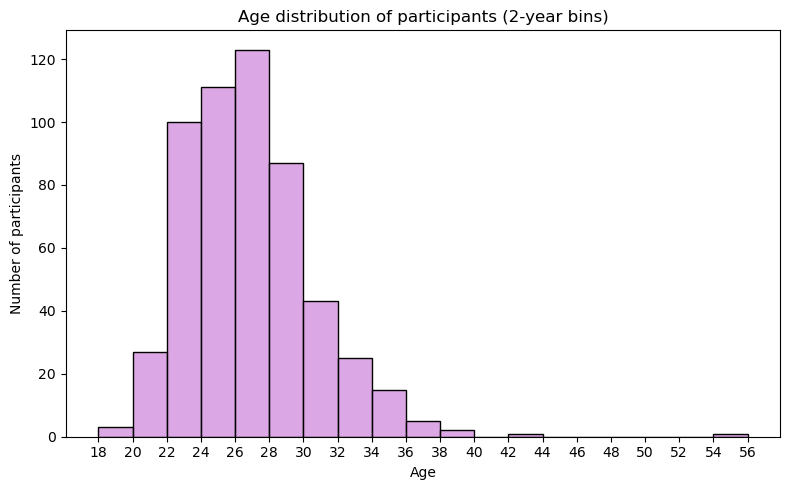

In [283]:
# One row per participant
participants = df.drop_duplicates("iid").copy()

# Define bins of 2 years, covering the whole age range
min_age = int(participants["age"].min())
max_age = int(participants["age"].max())
bins = np.arange(min_age, max_age + 2, 2)  # steps of 2 years

plt.figure(figsize=(8,5))
sns.histplot(
    data=participants,
    x="age",
    bins=bins,
    color="#D08ADB",       # nice green
    edgecolor="black"
)

plt.title("Age distribution of participants (2-year bins)")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.xticks(bins)  # show every bin edge for clarity
plt.tight_layout()
plt.show()


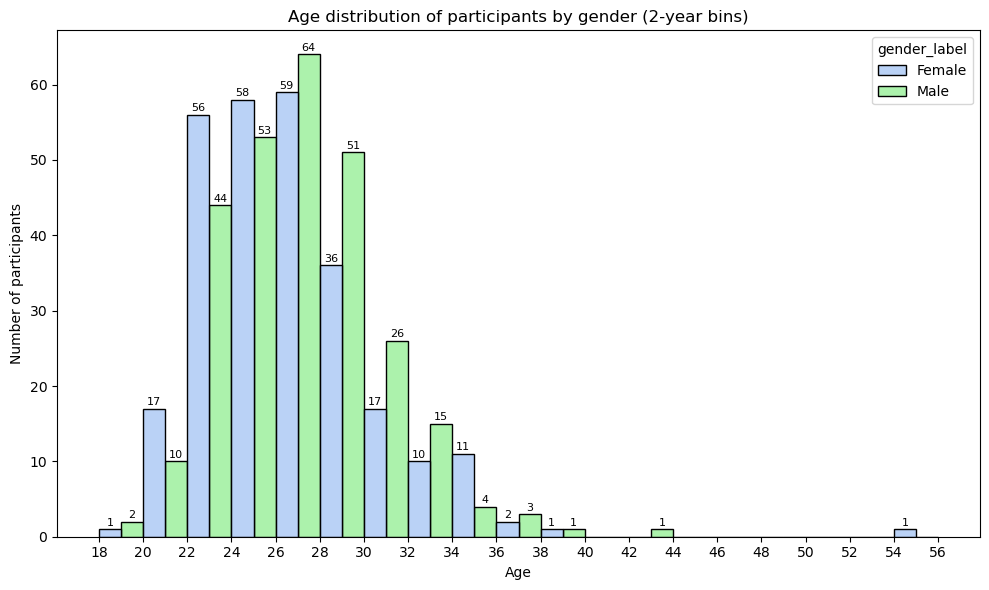

In [284]:
# One row per participant
participants = df.drop_duplicates("iid").copy()

# Map gender codes to labels (0=female, 1=male)
participants["gender_label"] = participants["gender"].map({0: "Female", 1: "Male"})

# Define 2-year bins
min_age = int(participants["age"].min())
max_age = int(participants["age"].max())
bins = np.arange(min_age, max_age + 2, 2)

plt.figure(figsize=(10,6))
ax = sns.histplot(
    data=participants,
    x="age",
    bins=bins,
    hue="gender_label",
    multiple="dodge",
    palette=["#a3c4f3", "#90ee90"],
    edgecolor="black"
)

plt.title("Age distribution of participants by gender (2-year bins)")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.xticks(bins)

# --- Add counts on top of bars ---
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # avoid empty bars
        ax.text(
            p.get_x() + p.get_width()/2, height + 0.2,
            f"{int(height)}",
            ha="center", va="bottom", fontsize=8
        )

plt.tight_layout()
plt.show()


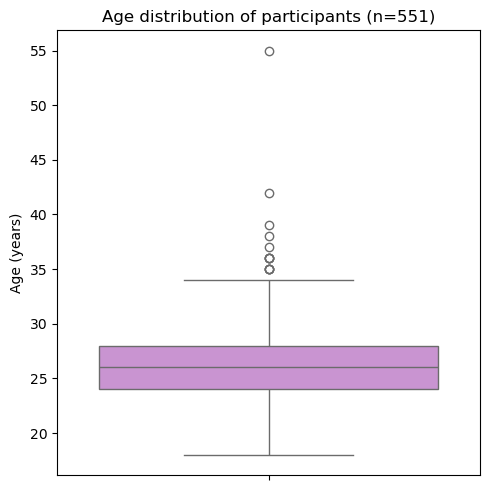

In [285]:
# One row per participant
participants = df.drop_duplicates("iid").copy()

plt.figure(figsize=(5,5))
ax = sns.boxplot(
    data=participants,
    y="age",
    color="#D08ADB"  # light blue
)

ax.set_title(f"Age distribution of participants (n={participants['iid'].nunique()})")
ax.set_ylabel("Age (years)")
plt.tight_layout()
plt.show()


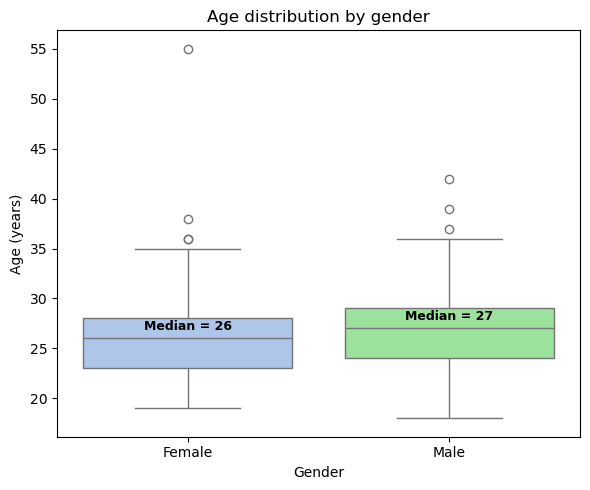

In [286]:
# One row per participant
participants = df.drop_duplicates("iid").copy()
participants["gender_label"] = participants["gender"].map({0: "Female", 1: "Male"})

plt.figure(figsize=(6,5))
ax = sns.boxplot(
    data=participants,
    x="gender_label", y="age",
    hue="gender_label",
    palette=["#a3c4f3", "#90ee90"],
    legend=False
)

# Add median values
medians = participants.groupby("gender_label")["age"].median()
for i, (gender, median_val) in enumerate(medians.items()):
    ax.text(
        i, median_val + 0.5,              # position: x=i, y=median slightly above
        f"Median = {median_val:.0f}",     # show as integer
        ha="center", va="bottom", fontsize=9, fontweight="bold"
    )

ax.set_title("Age distribution by gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Age (years)")
plt.tight_layout()
plt.show()


In [287]:
# One row per participant
participants = df.drop_duplicates("iid").copy()

# Calculate percentiles
p10 = participants["age"].quantile(0.10)
p90 = participants["age"].quantile(0.90)

print(f"80% of participants are between {p10:.0f} and {p90:.0f} years old.")


80% of participants are between 22 and 31 years old.


### How often participants go on dates

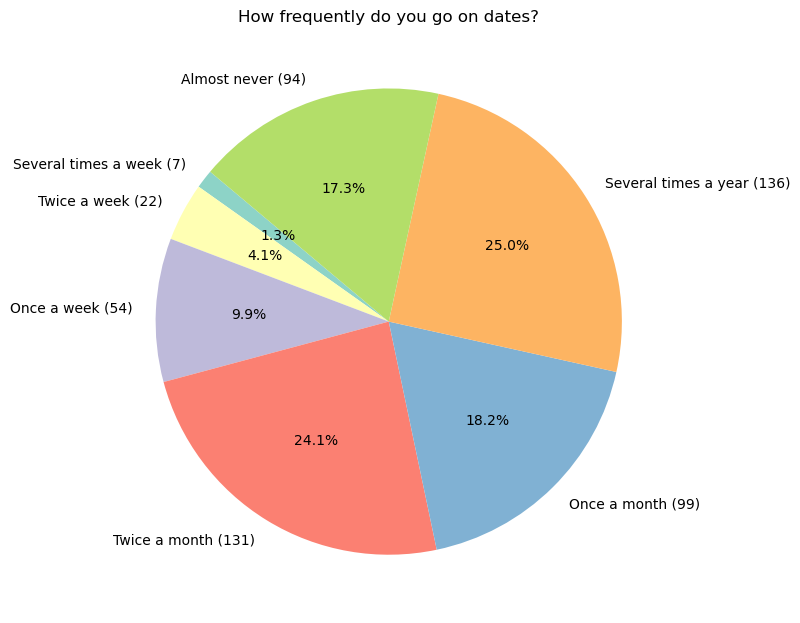

In [288]:
# Human-readable labels for `date`
DATE_LABELS = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"
}

# One row per participant
participants = df.drop_duplicates("iid").copy()

# Map numeric codes to labels
participants["date_label"] = participants["date"].map(DATE_LABELS).fillna("Unknown")

# Count participants by dating frequency
date_counts = participants["date_label"].value_counts().reindex(DATE_LABELS.values(), fill_value=0)

# Labels with counts
labels_with_counts = [f"{label} ({count})" for label, count in zip(date_counts.index, date_counts.values)]

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    date_counts,
    labels=labels_with_counts,
    autopct="%1.1f%%",   # show percentage inside slices
    startangle=140,
    colors=sns.color_palette("Set3", n_colors=len(date_counts))  # pastel colors
)

plt.title("How frequently do you go on dates?")
plt.tight_layout()
plt.show()


### How often Participants go out

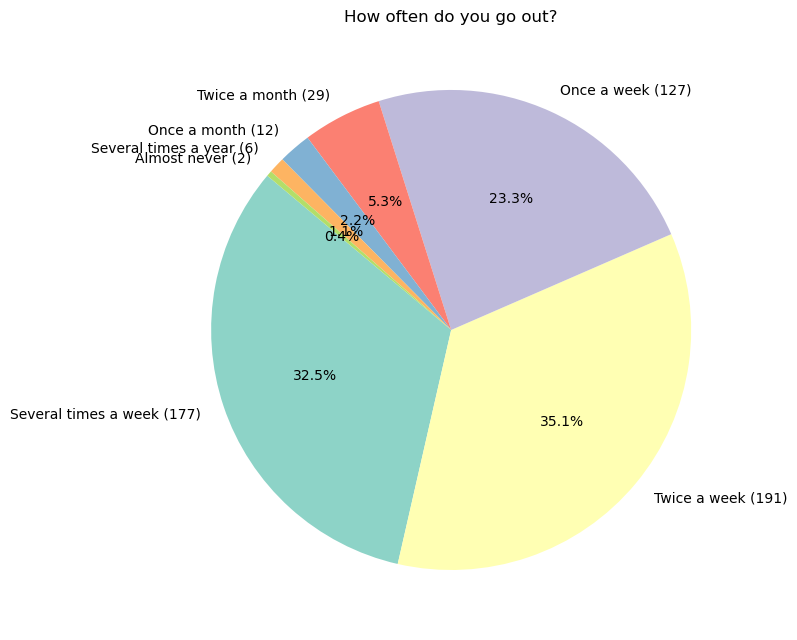

In [289]:
# Human-readable labels for `go_out`
GO_OUT_LABELS = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"
}

# One row per participant
participants = df.drop_duplicates("iid").copy()

# Map numeric codes to labels
participants["go_out_label"] = participants["go_out"].map(GO_OUT_LABELS).fillna("Unknown")

# Count participants by frequency of going out
go_out_counts = participants["go_out_label"].value_counts().reindex(GO_OUT_LABELS.values(), fill_value=0)

# Labels with counts
labels_with_counts = [f"{label} ({count})" for label, count in zip(go_out_counts.index, go_out_counts.values)]

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    go_out_counts,
    labels=labels_with_counts,
    autopct="%1.1f%%",   # percentage inside slices
    startangle=140,
    colors=sns.color_palette("Set3", n_colors=len(go_out_counts))  # soft distinct colors
)

plt.title("How often do you go out?")
plt.tight_layout()
plt.show()


### Opinion of the Participants on the number of dates per gender

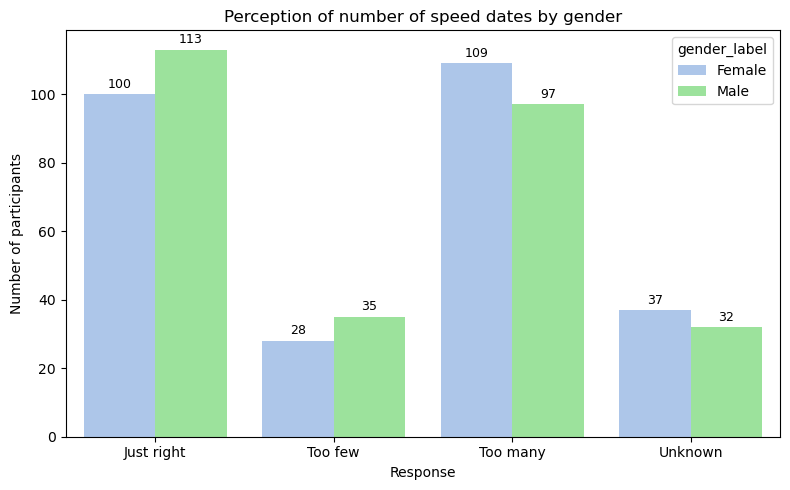

In [290]:
# Map codes to labels
NUMDAT_LABELS = {
    1: "Too few",
    2: "Too many",
    3: "Just right"
}

# Work on one row per participant (Timeline 2 only has one response per person)
participants = df.drop_duplicates("iid").copy()

# Add labels
participants["numdat_label"] = participants["numdat_2"].map(NUMDAT_LABELS).fillna("Unknown")
participants["gender_label"] = participants["gender"].map({0: "Female", 1: "Male"})

# Count responses by gender
numdat_counts = (
    participants.groupby(["gender_label", "numdat_label"])
    .size()
    .reset_index(name="Count")
)

# --- Barplot grouped by gender ---
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=numdat_counts,
    x="numdat_label", y="Count",
    hue="gender_label", palette=["#a3c4f3", "#90ee90"]
)

ax.set_title("Perception of number of speed dates by gender")
ax.set_xlabel("Response")
ax.set_ylabel("Number of participants")

# Annotate counts on bars
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.text(p.get_x() + p.get_width()/2, h + 1,
                f"{int(h)}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


### Opinion of the Participants on the lenght of the FOUR minutes dates per gender

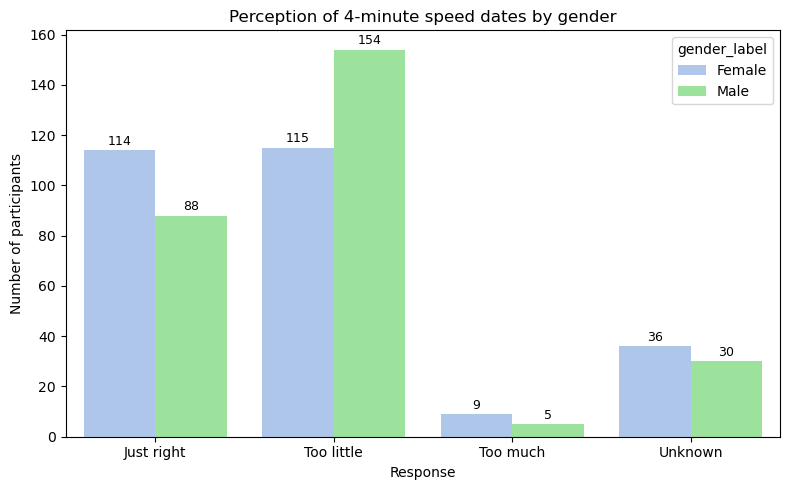

In [291]:
# Map codes to labels
LENGTH_LABELS = {
    1: "Too little",
    2: "Too much",
    3: "Just right"
}

# One row per participant
participants = df.drop_duplicates("iid").copy()

# Add labels
participants["length_label"] = participants["length"].map(LENGTH_LABELS).fillna("Unknown")
participants["gender_label"] = participants["gender"].map({0: "Female", 1: "Male"})

# Count responses by gender
length_counts = (
    participants.groupby(["gender_label", "length_label"])
    .size()
    .reset_index(name="Count")
)

# --- Barplot grouped by gender ---
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=length_counts,
    x="length_label", y="Count",
    hue="gender_label",
    palette=["#a3c4f3", "#90ee90"]
)

ax.set_title("Perception of 4-minute speed dates by gender")
ax.set_xlabel("Response")
ax.set_ylabel("Number of participants")

# Annotate counts on bars
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.text(
            p.get_x() + p.get_width()/2, h + 1,
            f"{int(h)}",
            ha="center", va="bottom", fontsize=9
        )

plt.tight_layout()
plt.show()


### Decisions of the Participants by gender

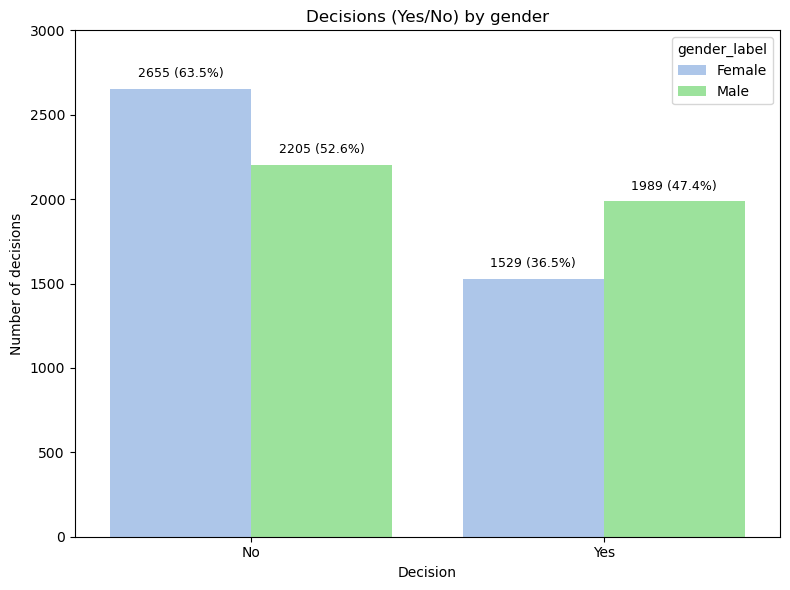

Total decisions per gender:
gender_label
Female    4184
Male      4194
Name: Count, dtype: int64


In [292]:
# Map labels
df["gender_label"] = df["gender"].map({0: "Female", 1: "Male"})
df["decision_label"] = df["dec"].map({0: "No", 1: "Yes"})

# Count decisions
decision_counts = (
    df.groupby(["gender_label", "decision_label"])
    .size()
    .reset_index(name="Count")
)

# Add percentages within each gender
totals_by_gender = decision_counts.groupby("gender_label")["Count"].transform("sum")
decision_counts["Percent"] = decision_counts["Count"] / totals_by_gender * 100

# --- Plot ---
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=decision_counts,
    x="decision_label", y="Count",
    hue="gender_label",
    palette=["#a3c4f3", "#90ee90"]
)

ax.set_title("Decisions (Yes/No) by gender")
ax.set_xlabel("Decision")
ax.set_ylabel("Number of decisions")
ax.set_ylim(0, 3000)   # 👈 fixed scale up to 3000

# Add counts and percentages on top of bars
for p, (_, row) in zip(ax.patches, decision_counts.iterrows()):
    h = p.get_height()
    if h > 0:
        ax.text(
            p.get_x() + p.get_width()/2, h + 50,
            f"{int(row['Count'])} ({row['Percent']:.1f}%)",
            ha="center", va="bottom", fontsize=9
        )

plt.tight_layout()
plt.show()

# --- Print totals per gender ---
totals = decision_counts.groupby("gender_label")["Count"].sum()
print("Total decisions per gender:")
print(totals)


Correlation between exphappy and decision: 0.095


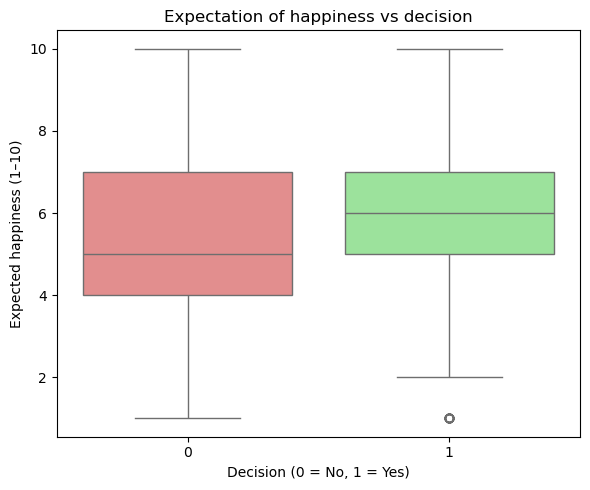

      count  mean  median   std
dec                            
0    4783.0  5.39     5.0  1.74
1    3494.0  5.73     6.0  1.70


In [313]:
# 1) Quick correlation
corr_value = df[["exphappy", "dec"]].corr().iloc[0,1]
print(f"Correlation between exphappy and decision: {corr_value:.3f}")

# 2) Boxplot: exphappy vs decision
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="dec", y="exphappy",
    hue="dec", palette=["lightcoral", "lightgreen"], legend=False
)
plt.title("Expectation of happiness vs decision")
plt.xlabel("Decision (0 = No, 1 = Yes)")
plt.ylabel("Expected happiness (1–10)")
plt.tight_layout()
plt.show()

# 3) Group means and medians
summary = (
    df.groupby("dec", observed=False)["exphappy"]
      .describe()[["count","mean","50%","std"]]
      .rename(columns={"50%":"median"})
      .round(2)
)
print(summary)


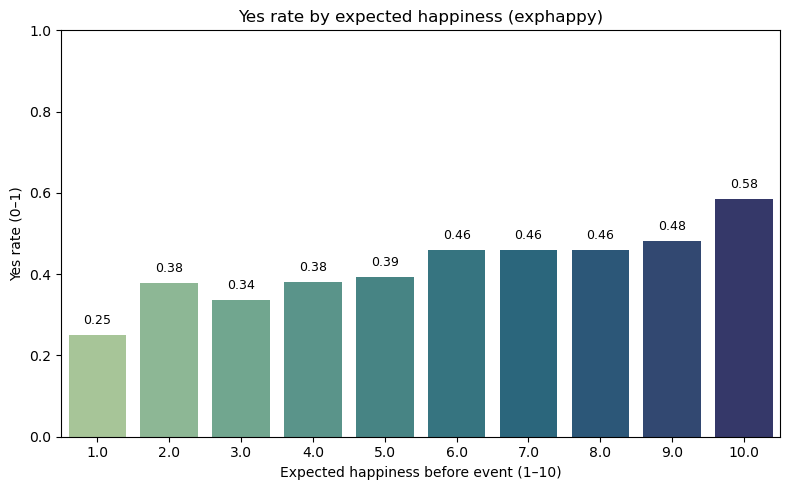

In [315]:
# 1) Compute yes rate per exphappy level
yes_rate_exhappy = (
    df.groupby("exphappy", observed=False)["dec"]
      .mean()
      .reset_index(name="yes_rate")
)

# 2) Barplot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=yes_rate_exhappy,
    x="exphappy", y="yes_rate",
    hue="exphappy", palette="crest", legend=False
)

# Titles and labels
ax.set_title("Yes rate by expected happiness (exphappy)")
ax.set_xlabel("Expected happiness before event (1–10)")
ax.set_ylabel("Yes rate (0–1)")
ax.set_ylim(0, 1)

# Add values above bars
for p in ax.patches:
    h = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, h + 0.02,
        f"{h:.2f}",
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


### Participants participation on each timeline

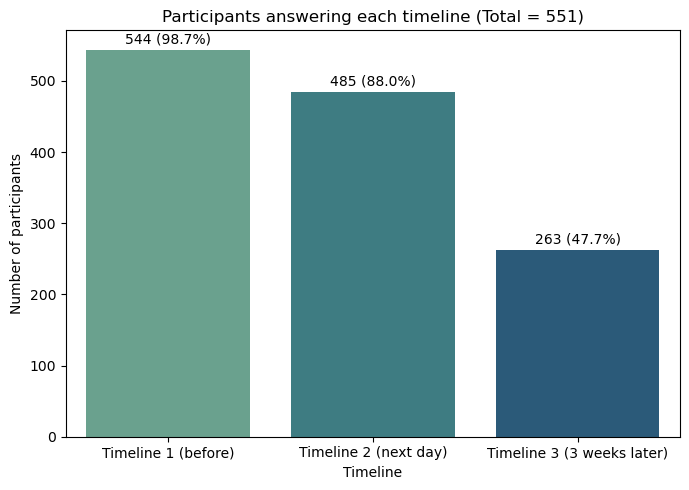

In [293]:
# --- Prepare participant timeline flags
ATTR_BASE = ['attr','sinc','intel','fun','amb','shar']

cols_1 = [c for c in df.columns if any(c.startswith(att) for att in ATTR_BASE) and c.endswith("_1")]
cols_2 = [c for c in df.columns if any(c.startswith(att) for att in ATTR_BASE) and c.endswith("_2")]
cols_3 = [c for c in df.columns if any(c.startswith(att) for att in ATTR_BASE) and c.endswith("_3")]

df_participants = df.drop_duplicates("iid").copy()
df_participants["has_1"] = df_participants[cols_1].notna().any(axis=1)
df_participants["has_2"] = df_participants[cols_2].notna().any(axis=1)
df_participants["has_3"] = df_participants[cols_3].notna().any(axis=1)

# --- Count participants per timeline
total_participants = df_participants.shape[0]

timeline_counts = {
    "Timeline 1 (before)": int(df_participants["has_1"].sum()),
    "Timeline 2 (next day)": int(df_participants["has_2"].sum()),
    "Timeline 3 (3 weeks later)": int(df_participants["has_3"].sum()),
}

timeline_counts_df = pd.DataFrame(list(timeline_counts.items()), columns=["Timeline", "Participants"])
timeline_counts_df["Percent"] = (timeline_counts_df["Participants"] / total_participants * 100).round(1)

# --- Barplot
plt.figure(figsize=(7,5))
sns.barplot(data=timeline_counts_df, x="Timeline", y="Participants", hue="Timeline", palette="crest", legend=False)

plt.title(f"Participants answering each timeline (Total = {total_participants})")
plt.xlabel("Timeline")
plt.ylabel("Number of participants")

# Annotate counts + percentages above bars
for i, row in timeline_counts_df.iterrows():
    plt.text(i, row["Participants"] + 5, f"{row['Participants']} ({row['Percent']}%)",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()


### Analysis of the participation of the 7 participants that didnt answer the first timeline

In [294]:
# --- Identify participants missing timeline 1
no_t1 = (
    df_participants.loc[~df_participants["has_1"], ["iid", "has_1", "has_2", "has_3"]]
    .sort_values("iid")
    .reset_index(drop=True)
)

# Make booleans more readable
no_t1_display = no_t1.replace({True: "Yes", False: "No"})

print("Participants who did not answer Timeline 1:")
display(no_t1_display)

print(f"\nTotal absent from T1: {no_t1.shape[0]}")


Participants who did not answer Timeline 1:


,iid,has_1,has_2,has_3
0,28,No,No,No
1,58,No,Yes,No
2,59,No,No,No
3,136,No,No,Yes
4,339,No,Yes,No
5,340,No,Yes,No
6,346,No,Yes,No



Total absent from T1: 7


### Average missing values per timelines

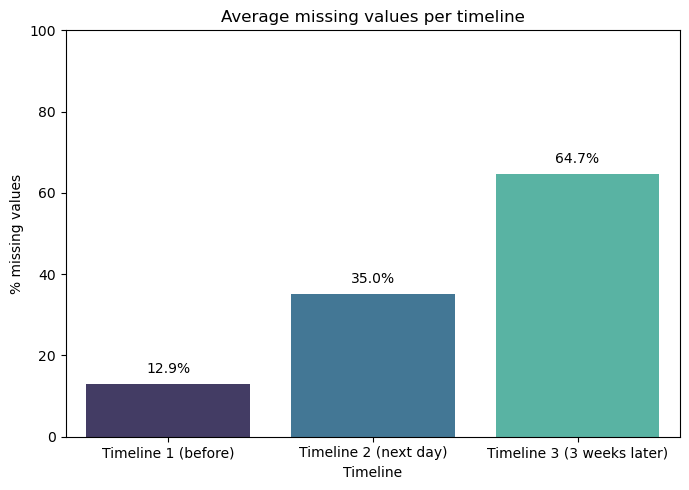

In [295]:
# --- Average missing values per timeline ---

def avg_missing(cols):
    """Return average % of missing values across the given columns."""
    if not cols:  # guard against empty list
        return 0.0
    return float(df[cols].isna().mean().mean() * 100)

missing_summary = {
    "Timeline 1 (before)": avg_missing(cols_1),
    "Timeline 2 (next day)": avg_missing(cols_2),
    "Timeline 3 (3 weeks later)": avg_missing(cols_3),
}

missing_df = pd.DataFrame(
    {"Timeline": list(missing_summary.keys()),
     "MissingPercent": list(missing_summary.values())}
)

# --- Barplot ---
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=missing_df, 
    x="Timeline", 
    y="MissingPercent", 
    hue="Timeline", 
    palette="mako", 
    legend=False
)

ax.set_title("Average missing values per timeline")
ax.set_xlabel("Timeline")
ax.set_ylabel("% missing values")
ax.set_ylim(0, 100)

# Add labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position
        height + 2,                     # y position (a bit above the bar)
        f"{height:.1f}%",               # label
        ha="center", va="bottom"
    )

plt.tight_layout()
plt.show()


### Normalization out of 10 of the notation of attributes and missing values per attribute rating columns

In [296]:
# List of the 6 attributs rated
ATTR_BASE = ['attr','sinc','intel','fun','amb','shar']

# --- Step 1: to know if the colum is a scorecard or partner rating that we know is already rated out of 10
def is_scorecard_or_partner_rating(c):
    return (c in ATTR_BASE) or (c in [f"{a}_o" for a in ATTR_BASE])


# --- Step 2: to identify the colomns already out of 10
scorecard_columns = [column for column in df.columns if column in ATTR_BASE] # Marks given during the evening
partner_rating_columns = [f"{attribut}_o" for attribut in ATTR_BASE if f"{attribut}_o" in df.columns] # Marks given by the partner
partner_pref_columns = [column for column in df.columns if column.startswith('pf_o_')] # preferences of the partner declared before the speed dating (out of 100, to normalize)


# --- Step 3: to extract the 2 last numbers to indicate the bloc number and the answering time ('attr1_1' -> '1_1' or 'sinc4_2' -> '4_2')
def suffix_token(column: str):
    m = re.search(r'(\d+_[123]|[13]_s)$', column) # Is looking for in c, the Regex (regular expression), m becomes an object with what if found
    return m.group(1) if m else None # group(1) because we want the first group found in the parenthesis of the Regex, if we find something it displays it (ex: 1_2) otherwise "None"

blocks = {}  # dictionary that will contain the blocks

for column in df.columns:
    # We only keep the columns out of 100
    if any(column.startswith(attribut) for attribut in ATTR_BASE) \
       and column not in scorecard_columns \
       and column not in partner_rating_columns:
        
        suffix = suffix_token(column)  # We get the suffix of the name of the column
        
        if suffix:  # if we find a valid suffix (ex: '1_1', '4_2', '3_s')
            # setdefault creates the suffix key if it doesn't exist already
            blocks.setdefault(suffix, []).append(column)

# Display to check
for suffix, block_columns in blocks.items():
    print(f"Bloc {suffix}: {len(block_columns)} colonnes -> {block_columns}")
    
# Summary
print("\nSummary:")
print(f"- Number of blocks found: {len(blocks)}")
print(f"- Number of columns to normalize: {sum(len(block_columns) for block_columns in blocks.values())}")


# --- Step 4: to normalize the blocks

def normalize_block_in_place(df, block_columns):
    """
    Normalize with this rule (line by line):
    -> if at least one value of the block > 10
    -> OR if the sum of the 6 values of the block > 60 (6x10)
    THEN : we consider this line was out of 100
    SO: we divide all the columns of this block by 10 for this line
    Skipna=True ignores the missing values (NaN) in the sum
        """
    block_dataframe = df[block_columns] # Extract only the columns of the current block
    need_division = (block_dataframe.gt(10).any(axis=1)) | (block_dataframe.sum(axis=1, skipna=True).gt(60)) # Identify rows that need to be divided by 10
    df.loc[need_division, block_columns] = block_dataframe[need_division] / 10 # Divide by 10 only for rows that require it

"""
block_dataframe = a small dataframe containing only the columns of one block.
need_division = a boolean mask (True/False per row) that marks which rows must be divided.
.gt(10).any(axis=1) = checks if any value in the row > 10.
.sum(axis=1, skipna=True).gt(60) = checks if the sum of the 6 attributes > 60.
df.loc[...] = ... = updates only the rows that need to be normalized.
"""


# --- Step 5: Apply normalization to each detected block ---
# blocks is a dictionnary like: {'1_1': ['attr1_1','sinc1_1',...], '2_2': [...], '3_s': [...]}

for suffix, block_columns in blocks.items():
    # Normalize this block in place (row-wise detection, divide by 10 if needed)
    normalize_block_in_place(df, block_columns)
    

# --- Step 6: Normalize partner's stated preferences (pf_o_*) the same way ---
if partner_pref_columns:
    # Same row-wise rule: if any value > 10 or row sum > 60 → divide by 10
    partner_pref_dataframe = df[partner_pref_columns]
    partner_pref_need_division = (partner_pref_dataframe.gt(10).any(axis=1)) | (partner_pref_dataframe.sum(axis=1, skipna=True).gt(60))
    df.loc[partner_pref_need_division, partner_pref_columns] = partner_pref_dataframe[partner_pref_need_division] / 10


# --- Step 7: Check if scorecard and partner rating columns are outside [0,10] ---

problematic_values = {}

for column in scorecard_columns + partner_rating_columns:
    # Select rows where the value is <0 or >10
    mask = (df[column] < 0) | (df[column] > 10)
    if mask.any():
        problematic_values[column] = df.loc[mask, column]

# If any problems were found, display them clearly
if problematic_values:
    print("⚠️ Values outside [0,10] found:")
    for column, values in problematic_values.items():
        print(f"- Column '{column}': {len(values)} problematic values")
        print(values.head())  # show first few cases for manual inspection
else:
    print("\n✅ All scorecard and partner rating columns are within [0,10].")


# --- Step 8a: Post-normalization sanity check (report-only, no auto-fix) ---

# Gather all normalized candidate columns (blocks + partner_pref)
all_block_columns = [col for block_cols in blocks.values() for col in block_cols] + partner_pref_columns

if all_block_columns:
    # Find rows where any normalized column goes beyond 10 (shouldn't happen after normalization)
    above_10_mask = df[all_block_columns].gt(10)
    below_0_mask  = df[all_block_columns].lt(0)

    has_above_10 = above_10_mask.any().any()
    has_below_0  = below_0_mask.any().any()

    if not has_above_10 and not has_below_0:
        print("\n✅ All normalized blocks (and pf_o_*) are within [0,10].")
    else:
        print("⚠️ Out-of-range values detected AFTER normalization (report-only):")
        if has_above_10:
            offending_cols = list(above_10_mask.any().loc[lambda s: s].index)
            print(f" - Columns with values > 10: {offending_cols}")
            # Show a few offending values per column
            for column in offending_cols:
                print(f"   • Sample >10 in '{column}':")
                print(df.loc[above_10_mask[column], column].head())
        if has_below_0:
            offending_cols = list(below_0_mask.any().loc[lambda s: s].index)
            print(f" - Columns with values < 0: {offending_cols}")
            for column in offending_cols:
                print(f"   • Sample <0 in '{column}':")
                print(df.loc[below_0_mask[column], column].head())
else:
    print("ℹ️ No normalized block columns found to check.")


# --- Step 8b: Missing-data rates on normalized columns

if all_block_columns:
    missing_by_col = df[all_block_columns].isna().mean().sort_values(ascending=False)
    print("\nMissing-data rate for each normalized column:")
    print((missing_by_col * 100).round(1).astype(str) + "%")
else:
    print("ℹ️ No normalized block columns found to check for missing data.")

Bloc 1_1: 6 colonnes -> ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
Bloc 4_1: 6 colonnes -> ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']
Bloc 2_1: 6 colonnes -> ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
Bloc 3_1: 5 colonnes -> ['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1']
Bloc 5_1: 5 colonnes -> ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']
Bloc 1_s: 6 colonnes -> ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']
Bloc 3_s: 5 colonnes -> ['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']
Bloc 7_2: 6 colonnes -> ['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']
Bloc 1_2: 6 colonnes -> ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']
Bloc 4_2: 6 colonnes -> ['attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2']
Bloc 2_2: 6 colonnes -> ['attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2']
Bloc 3_2: 5 colonnes -> ['attr3_2', 'sinc3_

### Correction of 2 errors in the csv (rated more than 10, out of 10)

In [297]:
# Cap to 10.0
df.loc[6216, 'attr_o'] = 10.0
df.loc[6608,  'fun_o']  = 10.0

### Ckeck that the rating is out of 10

In [298]:
# --- Full range check on ALL rating columns only (no ages/income/etc.) ---

# 1) Build the list of rating columns: scorecard + partner ratings + block columns + partner prefs
block_columns_all = [col for block_cols in blocks.values() for col in block_cols]  # uniquement les blocs
all_rating_columns = (
    scorecard_columns
    + partner_rating_columns
    + block_columns_all
    + partner_pref_columns
)

# Deduplicate while preserving order
from collections import OrderedDict
all_rating_columns = list(OrderedDict.fromkeys(all_rating_columns))

print(f"\nRange-checking {len(all_rating_columns)} rating columns in total...")

# 2) Define a robust range-check helper (ignores non-numeric values by coercing to NaN)
def check_range_on_columns(df, columns, lo=0, hi=10):
    """
    Returns a dict {column_name: Series_of_offending_values} for values outside [lo, hi].
    Non-numeric values are coerced to NaN and ignored in the check.
    """
    report = {}
    for col in columns:
        s = pd.to_numeric(df[col], errors='coerce')  # coerce non-numeric to NaN
        mask = s.notna() & ((s < lo) | (s > hi))
        if mask.any():
            report[col] = s[mask]
    return report

# 3) Run the check and print a clean report
out_of_range = check_range_on_columns(df, all_rating_columns, lo=0, hi=10)

if not out_of_range:
    print("✅ All rating columns are within [0,10] or NaN.")
else:
    total_bad = sum(len(v) for v in out_of_range.values())
    print(f"⚠️ Out-of-range values detected in {len(out_of_range)} columns "
          f"(total {total_bad} values outside [0,10]):")
    for col, series_bad in out_of_range.items():
        print(f"- {col}: {len(series_bad)} problematic values")
        # show a few examples (index -> value)
        print(series_bad.head())


Range-checking 125 rating columns in total...
✅ All rating columns are within [0,10] or NaN.


### Visual check

In [299]:
df.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,gender_label,decision_label
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,3.500,2.000,2.000,2.000,0.000,0.500,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,3.5,2.0,1.5,2.0,0.5,0.5,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.944,1.667,1.389,2.222,1.111,1.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Female,Yes
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,6.000,0.000,0.000,4.000,0.000,0.000,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,3.5,2.0,1.5,2.0,0.5,0.5,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.944,1.667,1.389,2.222,1.111,1.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Female,Yes
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,1.900,1.800,1.900,1.800,1.400,1.200,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,3.5,2.0,1.5,2.0,0.5,0.5,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.944,1.667,1.389,2.222,1.111,1.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,1.5,2.0,2.0,1.5,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Female,Yes
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,3.000,0.5

## Descriptive and visual statistics

### Average attribute rating received men vs women


=== Average ratings received by gender ===
                   attr_o  sinc_o  intel_o  fun_o  amb_o  shar_o
Women (receivers)    6.46    7.25     7.29   6.52   6.60    5.54
Men (receivers)      5.92    7.10     7.45   6.28   6.95    5.41


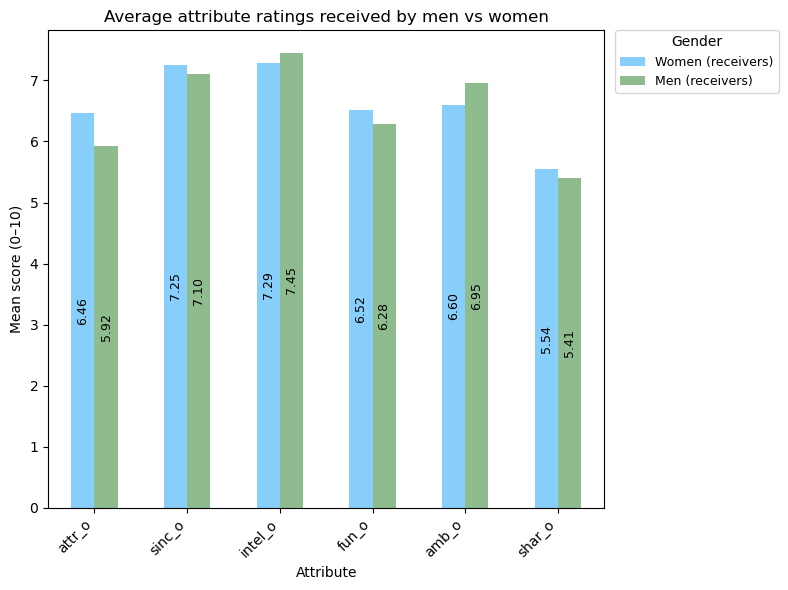

In [300]:
# --- Helper 1: Least desirable attributes by gender ---

# Group by gender (0 = female, 1 = male) and compute mean of received ratings
mean_ratings = df.groupby("gender")[[f"{a}_o" for a in ATTR_BASE]].mean()

# Rename index for clarity
mean_ratings.index = ["Women (receivers)", "Men (receivers)"]

print("\n=== Average ratings received by gender ===")
print(mean_ratings.round(2))

# --- Visualization: grouped bar plot with smaller legend and in-bar vertical labels
ax = mean_ratings.T.plot(
    kind="bar",
    figsize=(8, 6),
    color=["lightskyblue", "darkseagreen"]  # women = light blue, men = light green
)

ax.set_title("Average attribute ratings received by men vs women")
ax.set_ylabel("Mean score (0–10)")
ax.set_xlabel("Attribute")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Smaller legend, moved outside to avoid overlapping the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, labels, title="Gender",
    fontsize=9, title_fontsize=10,
    loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.0
)

# Add vertical labels (scores) inside each bar
# Uses matplotlib >= 3.4 for bar_label; falls back to manual text if needed
try:
    for container in ax.containers:
        ax.bar_label(
            container, fmt="%.2f", label_type="center",
            rotation=90, fontsize=9, color="black"
        )
except Exception:
    # Fallback method if bar_label is unavailable
    for container in ax.containers:
        for bar in container:
            h = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + h / 2
            ax.text(x, y, f"{h:.2f}", ha="center", va="center", rotation=90, fontsize=9, color="black")

plt.tight_layout()
plt.show()


### Attribute ratings by decision

In short, these plots reveal which qualities are most strongly associated with receiving a “Yes” compared to a “No.”

Each barplot compares the average score of a given attribute (e.g. attractiveness, sincerity, intelligence) between two groups of decisions:

Red bar (0 = No) → the average score received by participants who were not chosen.

Green bar (1 = Yes) → the average score received by participants who were chosen.

The height of the bar represents the mean score on a 0–10 scale. The error lines on top of each bar show how spread out the ratings are (the standard deviation).

Inside each bar you see the numerical average.

If the green bar is clearly taller than the red one, it means participants with higher scores on that attribute were more likely to be chosen.

If the two bars are very close, the attribute doesn’t seem to influence the decision much which is the case here.

The error bars help you judge reliability: wide error bars mean the ratings varied a lot, so the difference is less stable.

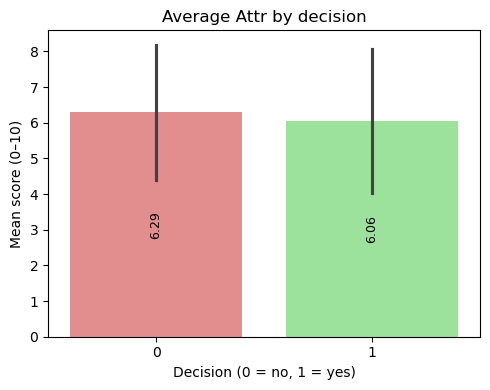

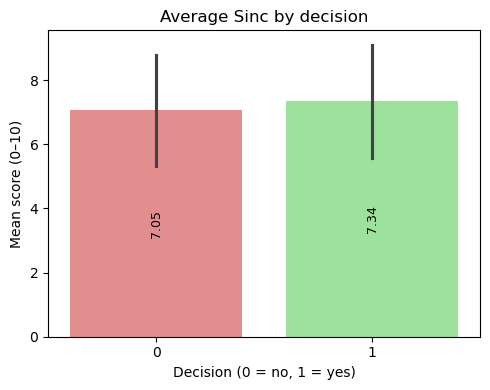

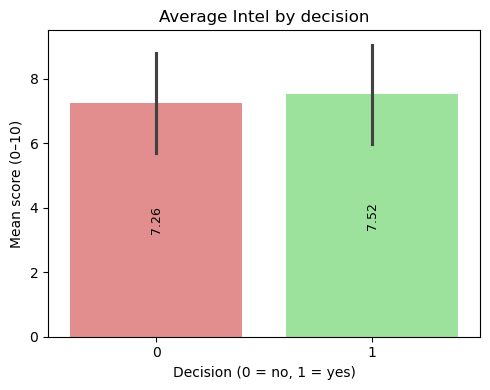

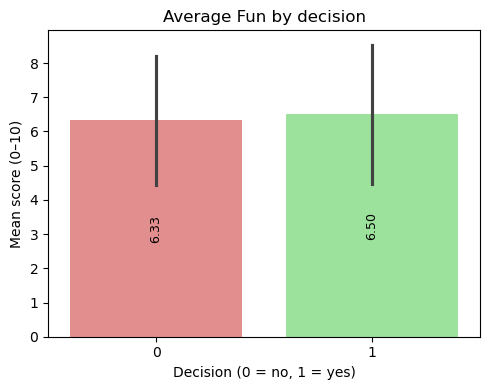

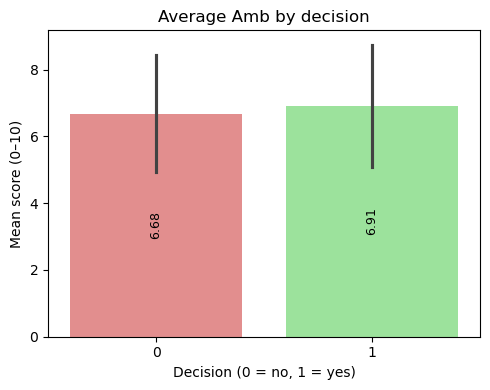

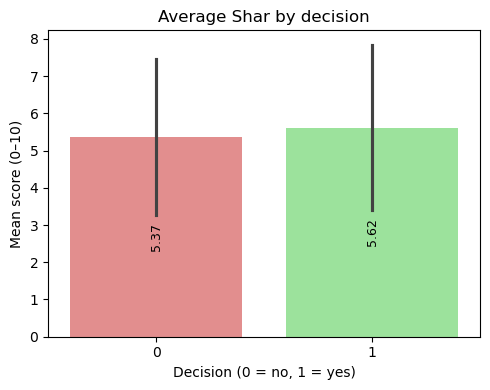

In [301]:
# List of attributes to compare by decision
ATTR_COLS = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]

for col in ATTR_COLS:
    plt.figure(figsize=(5,4))
    ax = sns.barplot(
        data=df,
        x="dec", 
        y=col,
        hue="dec",                 # fix: explicit hue
        palette=["lightcoral","lightgreen"],
        errorbar="sd",             # fix: replaces ci="sd"
        legend=False               # remove extra legend
    )
    
    ax.set_title(f"Average {col.replace('_o','').capitalize()} by decision")
    ax.set_xlabel("Decision (0 = no, 1 = yes)")
    ax.set_ylabel("Mean score (0–10)")
    
    # Add mean values inside bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2, height/2,
            f"{height:.2f}",
            ha="center", va="center", fontsize=9, color="black", rotation=90
        )
    
    plt.tight_layout()
    plt.show()


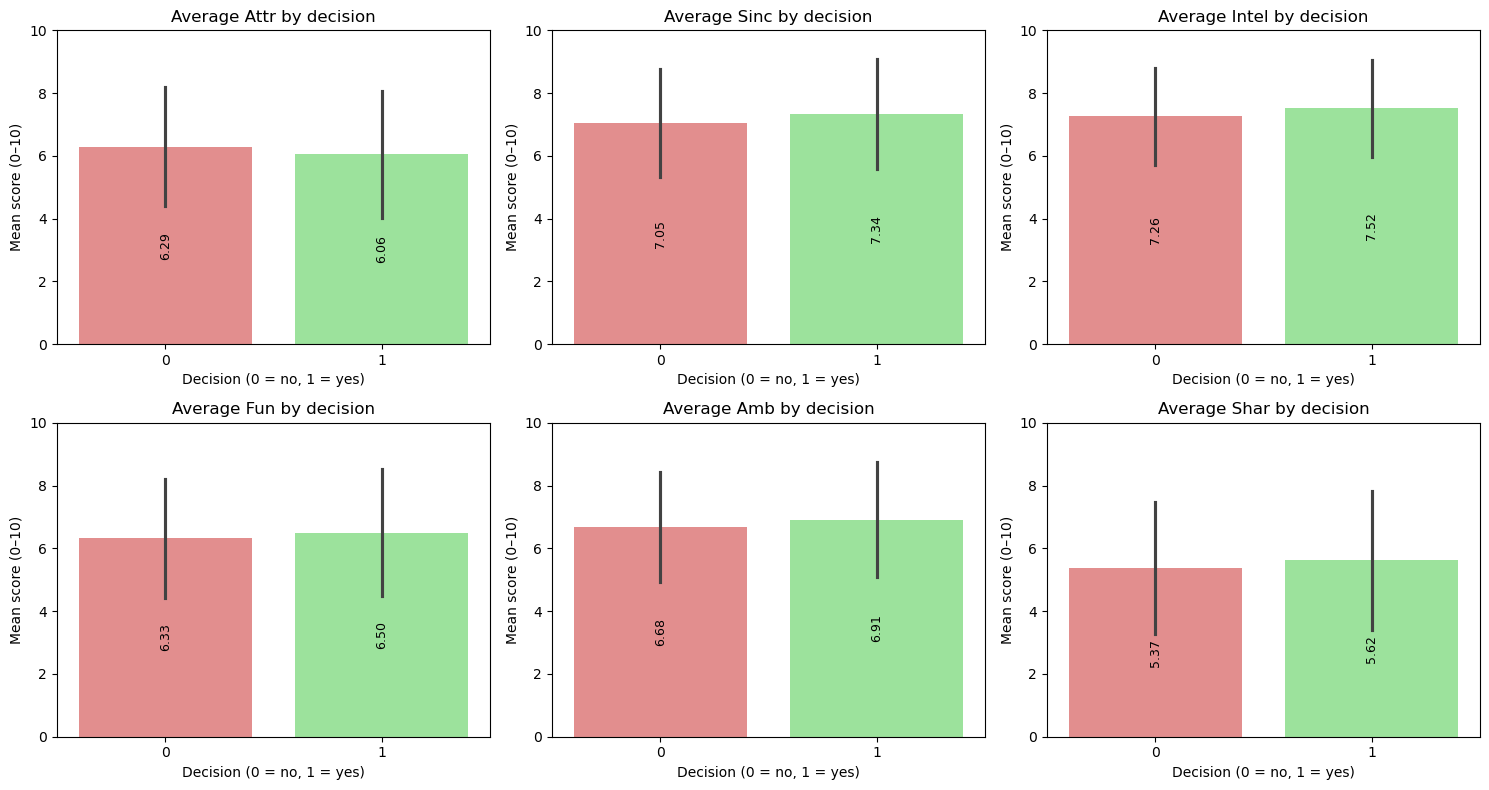

In [302]:
# List of attributes
ATTR_COLS = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]

# Create a figure with 2 rows × 3 columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(15,8))

# Flatten axes to iterate easily
axes = axes.flatten()

# Plot each attribute
for i, col in enumerate(ATTR_COLS):
    ax = axes[i]
    sns.barplot(
        data=df,
        x="dec",
        y=col,
        hue="dec",
        palette=["lightcoral", "lightgreen"],
        errorbar="sd",
        legend=False,
        ax=ax
    )
    
    ax.set_title(f"Average {col.replace('_o','').capitalize()} by decision")
    ax.set_xlabel("Decision (0 = no, 1 = yes)")
    ax.set_ylabel("Mean score (0–10)")
    ax.set_ylim(0, 10)  # keep the same scale across all plots
    
    # Add mean values inside bars
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2, h/2,
            f"{h:.2f}",
            ha="center", va="center", fontsize=9, color="black", rotation=90
        )

plt.tight_layout()
plt.show()


### Correlation between attributes and decision

Correlation with decision (dec):
intel_o    0.082
sinc_o     0.081
amb_o      0.063
shar_o     0.058
fun_o      0.044
attr_o    -0.059
Name: dec, dtype: float64


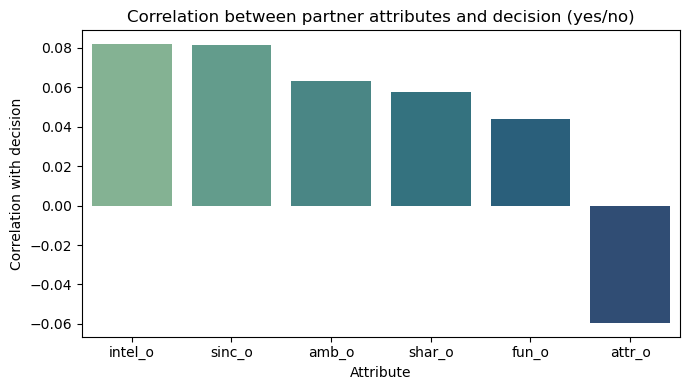

In [303]:
# Attributes rated by partners
partner_cols = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]

# Correlation with the decision
corrs = df[partner_cols + ["dec"]].corr()["dec"].drop("dec").sort_values(ascending=False)

# Print table
print("Correlation with decision (dec):")
print(corrs.round(3))

# Plot
plt.figure(figsize=(7,4))
sns.barplot(
    x=corrs.index, y=corrs.values, 
    hue=corrs.index, palette="crest", legend=False
)
plt.title("Correlation between partner attributes and decision (yes/no)")
plt.ylabel("Correlation with decision")
plt.xlabel("Attribute")
plt.tight_layout()
plt.show()


### Decision Rate by Order of Date

In sort, this chart shows the average Yes rate (0–1) depending on the order of appearance during the evening. A flat line means order had little effect, while a downward or upward trend would indicate that going earlier or later influenced the chances of receiving a “Yes.”

This line chart shows the proportion of “Yes” decisions depending on the order in which a participant appeared during the speed-dating night.

The x-axis represents the position in the sequence of dates (1st, 2nd, 3rd, etc.).

The y-axis shows the Yes rate, i.e. the fraction of “Yes” decisions, ranging from 0 to 1 (0% to 100%).

Each point indicates the average Yes rate for participants at that order.

How to read it:

A flat line means that the order of appearance had little or no effect on outcomes.

A downward trend would suggest that participants later in the evening received fewer Yes responses (possible fatigue or decision overload).

An upward trend would suggest that later participants were more likely to be chosen (perhaps people became more open as the night progressed).

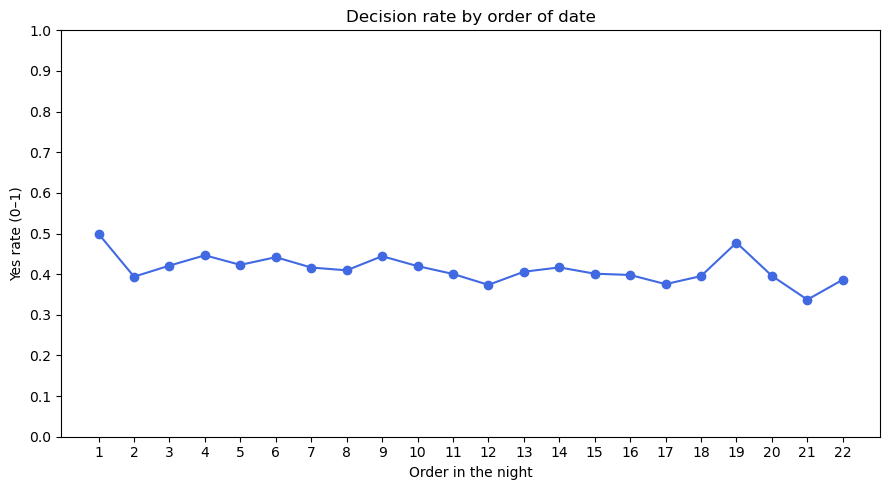

In [304]:
order_rate = df.groupby("order")["dec"].mean()

plt.figure(figsize=(9,5))
ax = order_rate.plot(marker="o", linestyle="-", color="royalblue")

plt.title("Decision rate by order of date")
plt.xlabel("Order in the night")
plt.ylabel("Yes rate (0–1)")

ax.set_xticks(order_rate.index)
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()


Zoomed in:

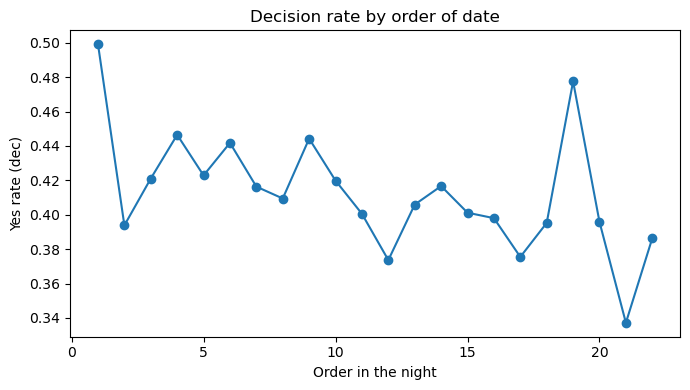

In [305]:
order_rate = df.groupby("order")["dec"].mean()

plt.figure(figsize=(7,4))
order_rate.plot(marker="o")

plt.title("Decision rate by order of date")
plt.xlabel("Order in the night")
plt.ylabel("Yes rate (dec)")

plt.tight_layout()
plt.show()


### Decision Rate by Same-Race Indicator

In short, this chart shows the average Yes rate depending on whether the pair was of the same race (1) or not (0). A higher bar for “1” means participants were more likely to say Yes when matched with someone of the same race.

This barplot compares the average “Yes” decision rate depending on whether the pair was of the same race or not.

The x-axis shows two categories: 0 = No (different race) and 1 = Yes (same race).

The y-axis indicates the Yes rate, ranging from 0 to 1.

The number inside each bar represents the average Yes rate for that group.

How to read it:

A higher bar for 1 = Yes means participants were more likely to say “Yes” when the other person was of the same race.

If the two bars are similar, race similarity had little to no effect on decisions.

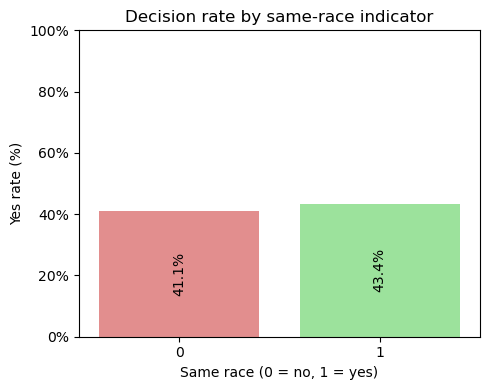

In [306]:
from matplotlib.ticker import PercentFormatter

# --- Compute yes rate by same-race indicator ---
race_rate = df.groupby("samerace")["dec"].mean().reset_index()

plt.figure(figsize=(5,4))
ax = sns.barplot(
    data=race_rate,
    x="samerace",
    y="dec",
    hue="samerace",
    palette=["lightcoral", "lightgreen"],
    legend=False
)

ax.set_title("Decision rate by same-race indicator")
ax.set_xlabel("Same race (0 = no, 1 = yes)")
ax.set_ylabel("Yes rate (%)")
ax.set_ylim(0,1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # transforme 0.34 -> 34%

# Add percentage labels inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, height/2,
        f"{height*100:.1f}%",       # label en %
        ha="center", va="center", fontsize=10, color="black", rotation=90
    )

plt.tight_layout()
plt.show()


### Importance of religion in the decision

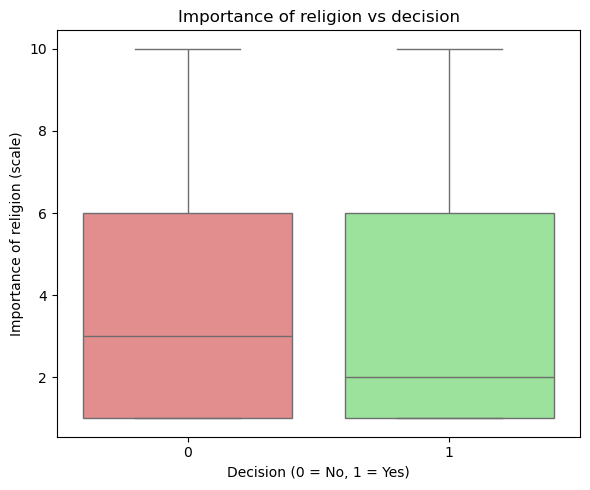

In [307]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="dec", y="imprelig",
    hue="dec", palette=["lightcoral", "lightgreen"], legend=False
)
plt.title("Importance of religion vs decision")
plt.xlabel("Decision (0 = No, 1 = Yes)")
plt.ylabel("Importance of religion (scale)")
plt.tight_layout()
plt.show()


### Importance of the income in the decision

The average and median incomes are very close between Yes and No decisions (≈ 1,400 difference in mean, ≈ 2,400 in median).

The spread (standard deviation) is nearly identical, showing that both groups cover the same range of incomes.

Both Yes and No decisions occur at all income levels, from the lowest to the highest earners.

Conclusion:
“Income does not appear to play a meaningful role in participants’ decisions. People said yes or no across all income levels, and the distributions look almost identical.”

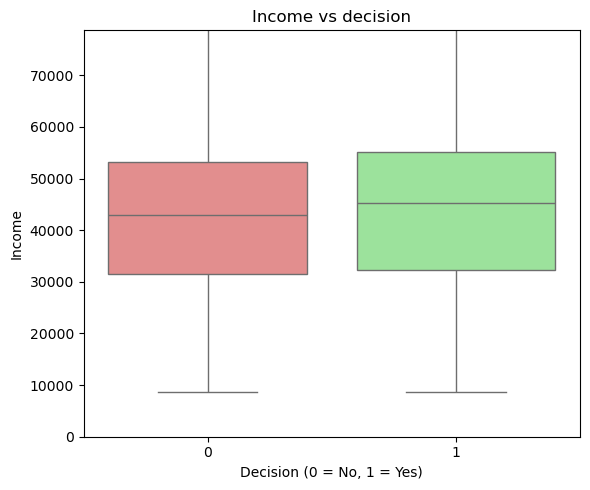

      count      mean   median       std     min       max
dec                                                       
0    2585.0  44322.09  42897.0  17320.58  8607.0  109031.0
1    1694.0  45750.56  45300.0  17000.88  8607.0  109031.0


In [310]:
# 1) Make a numeric version of income (handles commas, text, etc.)
#    - Keep only digits and dots, coerce the rest to NaN
income_num = (
    df["income"]
      .astype(str)
      .str.replace(",", "", regex=False)           # remove thousands separators
      .str.extract(r"([\d.]+)")                    # keep numeric part
      .squeeze()
)
df["income_num"] = pd.to_numeric(income_num, errors="coerce")

# 2) Boxplot with proper hue to avoid seaborn 0.14 warning
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="dec", y="income_num",
    hue="dec", palette=["lightcoral", "lightgreen"], legend=False
)

plt.title("Income vs decision")
plt.xlabel("Decision (0 = No, 1 = Yes)")
plt.ylabel("Income")

# Optional: clip extreme outliers for readability (only if you want)
p95 = df["income_num"].quantile(0.95)
if pd.notna(p95):
    plt.ylim(0, p95)

plt.tight_layout()
plt.show()

# 3) Quick numeric check
print(
    df.groupby("dec", observed=False)["income_num"]
      .describe()[["count","mean","50%","std","min","max"]]
      .rename(columns={"50%":"median"})
      .round(2)
)


### Number of decisions of the night

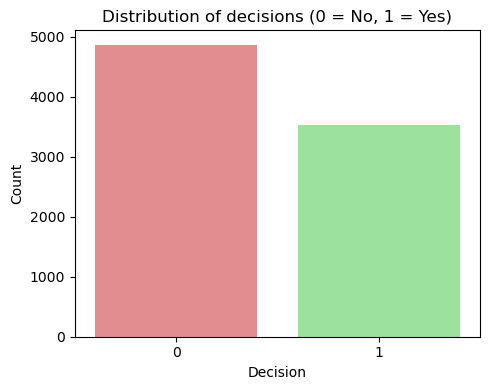

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(
    data=df,
    x="dec",
    hue="dec",                          # explicit hue
    palette=["lightcoral","lightgreen"],
    legend=False                        # remove redundant legend
)

plt.title("Distribution of decisions (0 = No, 1 = Yes)")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Distribution of Attribute Ratings by Decision

In short, this plot highlights which qualities differentiate chosen vs. non-chosen participants, and how strong that difference is across all attributes.

What the plot shows

X-axis → the six main attributes rated by others: Attractiveness (attr_o), Sincerity (sinc_o), Intelligence (intel_o), Fun (fun_o), Ambition (amb_o), and Shared interests (shar_o).

Y-axis → the distribution of scores received for each attribute, on a scale from 0 to 10.

Two boxes per attribute:

Red (0 = No) → ratings of participants who were not chosen.

Green (1 = Yes) → ratings of participants who were chosen.

Each boxplot summarizes the distribution:

The horizontal line inside the box = the median score.

The box edges = the interquartile range (middle 50% of the data).

The whiskers = the spread of the rest of the data (excluding extreme outliers).

Individual dots (if visible) = outliers.


How to interpret it

If the green box is clearly shifted higher than the red one for an attribute, it means that higher ratings in this attribute are associated with receiving a “Yes.”

If the boxes overlap strongly, it suggests that this attribute doesn’t play a major role in the decision.

Comparing across attributes lets you see which characteristics matter most: e.g., if attractiveness (attr_o) shows a large gap, while sincerity (sinc_o) does not, then attractiveness is a stronger driver of matches.

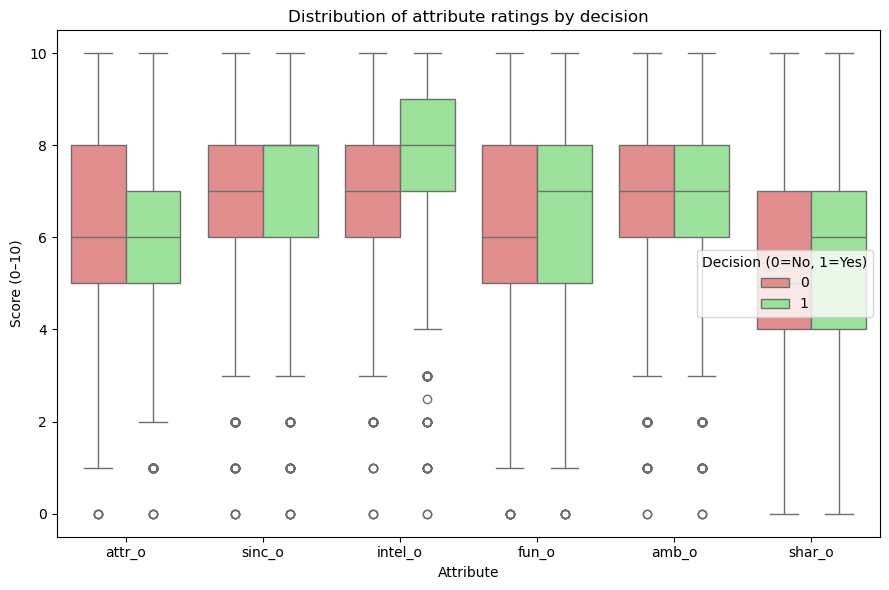

In [ ]:
# Select the attributes of interest
ATTR_COLS = ["attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o"]

# Reshape the DataFrame: from wide to long
df_long = df.melt(
    id_vars="dec",
    value_vars=ATTR_COLS,
    var_name="Attribute",
    value_name="Score"
)

# Create boxplot for all attributes at once
plt.figure(figsize=(9,6))
sns.boxplot(
    data=df_long,
    x="Attribute", 
    y="Score", 
    hue="dec", 
    palette=["lightcoral","lightgreen"]
)

plt.title("Distribution of attribute ratings by decision")
plt.xlabel("Attribute")
plt.ylabel("Score (0–10)")
plt.legend(title="Decision (0=No, 1=Yes)")
plt.tight_layout()
plt.show()


Overall Takeaway

Most influential attributes: Intelligence and Fun, which show consistent upward shifts for the Yes group.

Moderate influence: Sincerity, with a small but visible increase.

Little to no influence: Attractiveness (almost identical distributions), Ambition (no difference), and Shared interests (minimal gap).

In short: participants rated as more intelligent, fun, and somewhat more sincere were more likely to be chosen, while other traits showed weaker or no effect.

### Decision rate by difference of age

How to read the graph

X-axis: the age difference between two participants, grouped into bins:

0–2 years, 3–5 years, 6–10 years, 11–20 years, 20+ years.

Y-axis: the decision rate, i.e., the average proportion of “yes” answers to a second date in that age-difference group.

Since dec is coded 0 = no, 1 = yes, the mean value is the percentage of yes decisions.

Example: a bar at 0.40 means 40% of the encounters in that age gap resulted in a “yes”.

Bars: each bar shows the yes rate for one age-difference bin.

Taller bar = higher probability of saying yes.

Shorter bar = lower probability.

Numbers above the bars: the exact yes rate, written as a decimal (e.g., 0.34 = 34%).

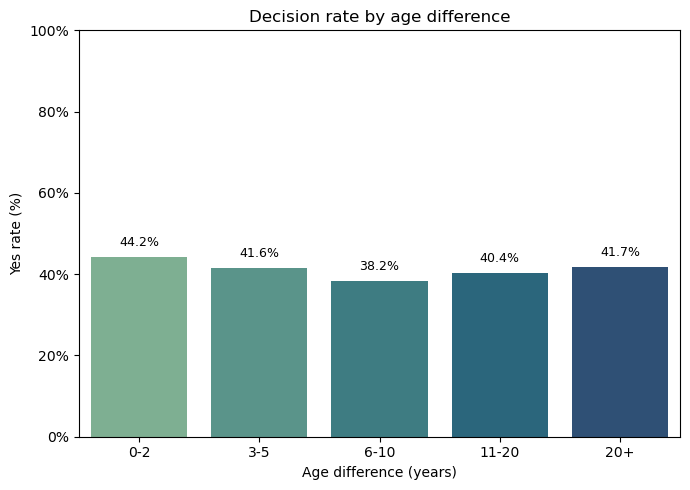

In [ ]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=age_rate, 
    x="age_diff_bin", 
    y="dec", 
    hue="age_diff_bin", 
    palette="crest", 
    legend=False
)

ax.set_title("Decision rate by age difference")
ax.set_xlabel("Age difference (years)")
ax.set_ylabel("Yes rate (%)")
ax.set_ylim(0,1)  # reste en proportions
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # convertit 0.34 -> 34%

# Add percentage labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, height + 0.02,
        f"{height*100:.1f}%", 
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


### Decision rate by field of study

Horizontal

How to read this chart

What’s plotted: For each field of study, the bar shows the share of dates that resulted in a “yes” to a second date. Since dec is coded 0/1, the mean of dec is a yes rate.

Axes:

If bars are horizontal: the X-axis is the yes rate (in %), the Y-axis lists fields.

If bars are vertical: the Y-axis is the yes rate (%) and the X-axis lists fields.

Labels: Percent values are printed next to/above each bar (e.g., 42.3%).

Sample size filter: To avoid unstable estimates, only fields with at least 30 observations are shown. This keeps the comparison fairer.

Sorting: Fields are sorted by yes rate, so you can quickly see which fields have higher vs lower second-date acceptance.

What it means: This is descriptive (not causal). A higher bar means that, in this dataset, participants from that field more often said “yes”—but differences can reflect group composition or sample size, not the field itself.

Use this as a high-level comparison: which study fields in our sample tend to have higher second-date acceptance rates? Always interpret alongside the sample size by field chart to avoid overreading small groups.

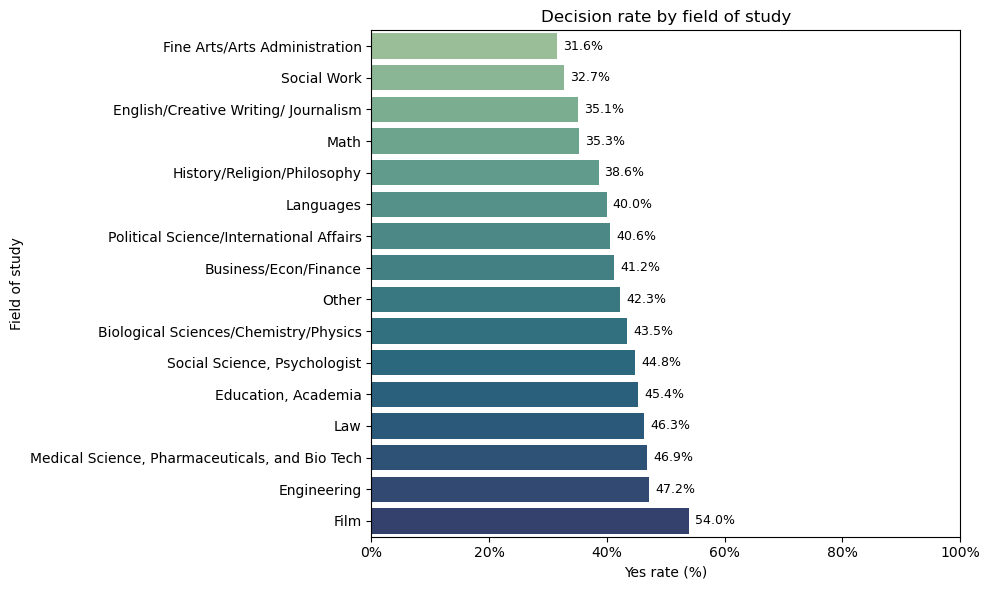

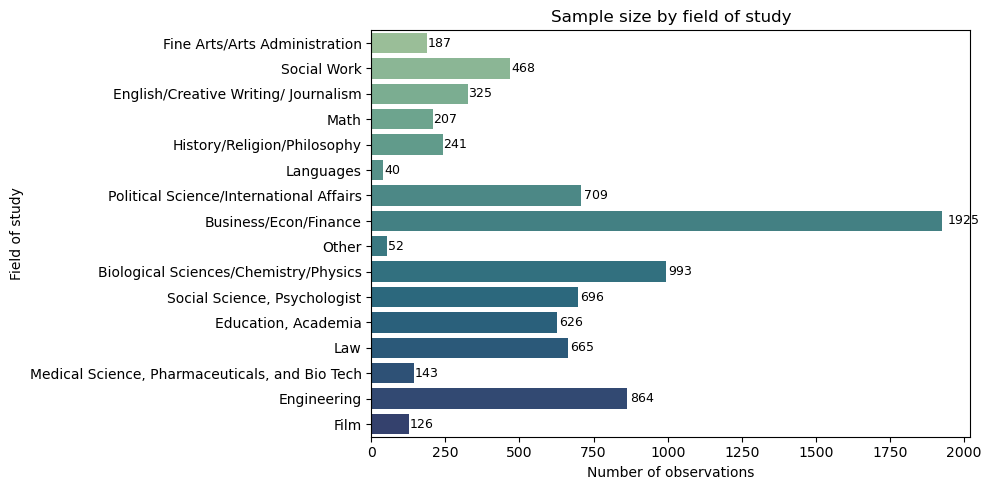

,field,n,yes_rate
13,Film,126,54.0%
4,Engineering,864,47.2%
3,"Medical Science, Pharmaceuticals, and Bio Tech",143,46.9%
0,Law,665,46.3%
8,"Education, Academia",626,45.4%
2,"Social Science, Psychologist",696,44.8%
9,Biological Sciences/Chemistry/Physics,993,43.5%
17,Other,52,42.3%
7,Business/Econ/Finance,1925,41.2%
12,Political Science/International Affairs,709,40.6%


In [ ]:
from matplotlib.ticker import PercentFormatter

# 1) Agrégat
df_field = (
    df.groupby("field_cd", observed=False)
      .agg(n=("dec", "size"), yes_rate=("dec", "mean"))
      .reset_index()
)

# 2) Labels lisibles
df_field["field"] = df_field["field_cd"].map(FIELD_LABELS).fillna(df_field["field_cd"].astype(str))

# 3) Filtre taille mini (évite groupes trop petits)
MIN_N = 30
df_plot = df_field[df_field["n"] >= MIN_N].copy()

# 4) Tri par taux de “oui”
df_plot = df_plot.sort_values("yes_rate", ascending=True)  # ascending pour barres horizontales

# === Plot 1: Yes rate by field (en %) ===
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_plot,
    y="field", x="yes_rate",
    hue="field", palette="crest", legend=False
)
ax.set_title("Decision rate by field of study")
ax.set_xlabel("Yes rate (%)")
ax.set_ylabel("Field of study")
ax.set_xlim(0, 1)
ax.xaxis.set_major_formatter(PercentFormatter(1.0))  # 0.34 -> 34%

# Labels en %
for p in ax.patches:
    w = p.get_width()
    ax.text(
        w + 0.01,               # petit décalage à droite de la barre
        p.get_y() + p.get_height()/2,
        f"{w*100:.1f}%",
        va="center", ha="left", fontsize=9
    )

plt.tight_layout()
plt.show()

# === Plot 2: Sample size par field ===
plt.figure(figsize=(10,5))
ax2 = sns.barplot(
    data=df_plot,
    y="field", x="n",
    hue="field", palette="crest", legend=False
)
ax2.set_title("Sample size by field of study")
ax2.set_xlabel("Number of observations")
ax2.set_ylabel("Field of study")

# Labels d'effectif
for p in ax2.patches:
    w = p.get_width()
    ax2.text(
        w + max(3, 0.01*w),
        p.get_y() + p.get_height()/2,
        f"{int(w)}",
        va="center", ha="left", fontsize=9
    )

plt.tight_layout()
plt.show()

# Tableau récap
display(
    df_plot[["field","n","yes_rate"]]
      .assign(yes_rate=lambda d: (d["yes_rate"]*100).round(1).astype(str) + "%")
      .sort_values("yes_rate", ascending=False)
)


Vertical

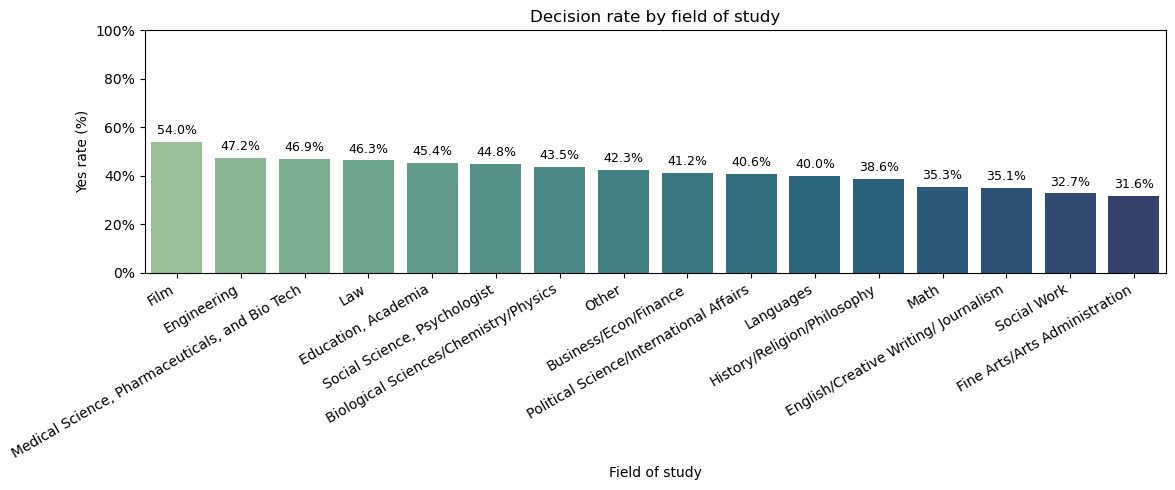

In [ ]:
from matplotlib.ticker import PercentFormatter

# df_plot construit comme ci-dessus
df_plot_v = df_plot.sort_values("yes_rate", ascending=False)

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=df_plot_v,
    x="field", y="yes_rate",
    hue="field", palette="crest", legend=False
)
ax.set_title("Decision rate by field of study")
ax.set_xlabel("Field of study")
ax.set_ylabel("Yes rate (%)")
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Rotation propre des labels X SANS warning
plt.xticks(rotation=30, ha="right")

# Labels en %
for p in ax.patches:
    h = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, h + 0.02,
        f"{h*100:.1f}%",
        ha="center", va="bottom", fontsize=9
    )

plt.tight_layout()
plt.show()


### Number of participants by field study in total and per gender

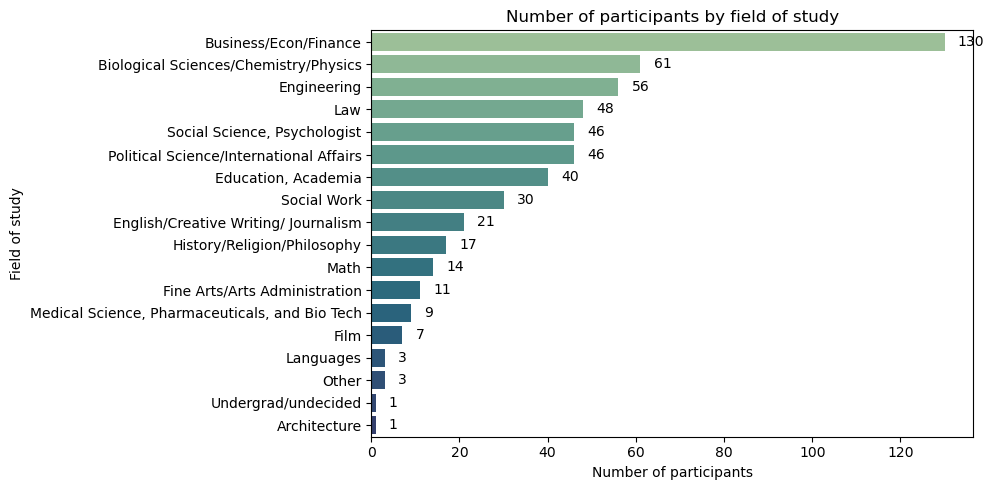

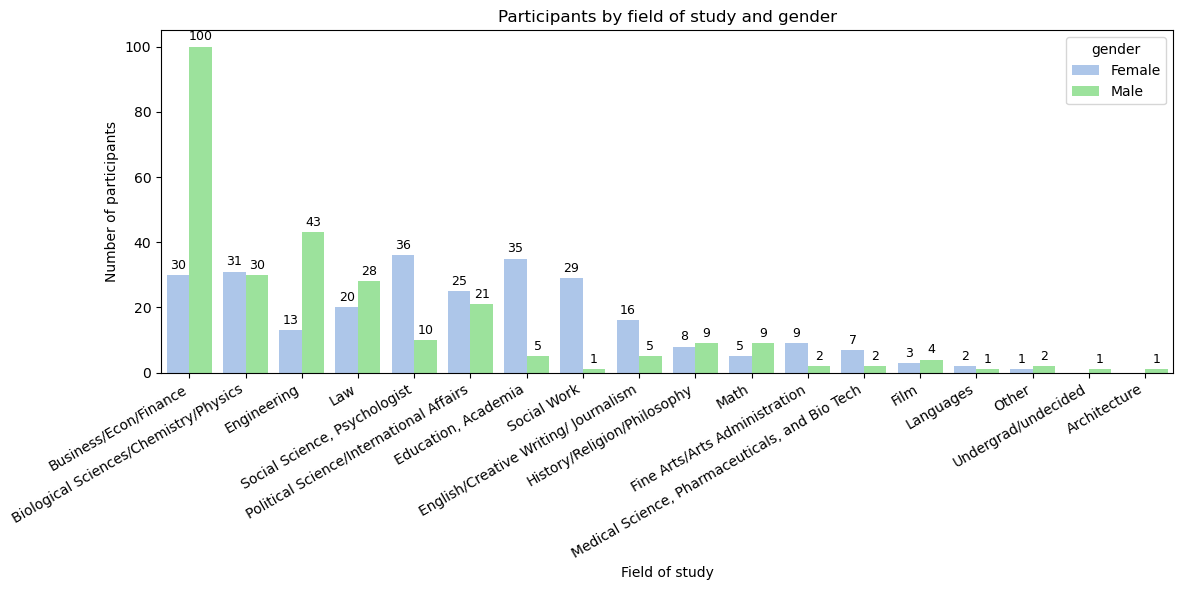

In [ ]:
# --- 1) Count total participants per field ---
field_counts = (
    df.drop_duplicates("iid")  # keep one row per participant
      .groupby("field_cd")["iid"]
      .count()
      .reset_index(name="n_participants")
)

field_counts["field"] = field_counts["field_cd"].map(FIELD_LABELS).fillna(field_counts["field_cd"].astype(str))
field_counts = field_counts.sort_values("n_participants", ascending=False)

# Plot total counts
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=field_counts,
    y="field", x="n_participants",
    hue="field", palette="crest", legend=False
)
ax.set_title("Number of participants by field of study")
ax.set_xlabel("Number of participants")
ax.set_ylabel("Field of study")

for p in ax.patches:
    w = p.get_width()
    ax.text(w + 3, p.get_y() + p.get_height()/2,
            f"{int(w)}", va="center")

plt.tight_layout()
plt.show()


# --- 2) Count participants by gender within each field ---
field_gender_counts = (
    df.drop_duplicates("iid")
      .groupby(["field_cd", "gender"])["iid"]
      .count()
      .reset_index(name="n_participants")
)

# Add field labels
field_gender_counts["field"] = field_gender_counts["field_cd"].map(FIELD_LABELS).fillna(field_gender_counts["field_cd"].astype(str))

# Replace gender codes with text
field_gender_counts["gender"] = field_gender_counts["gender"].map({0: "Female", 1: "Male"})

# --- Ensure same order as field_counts ---
order_fields = field_counts["field"].tolist()

# Plot grouped bars with same order
plt.figure(figsize=(12,6))
ax2 = sns.barplot(
    data=field_gender_counts,
    x="field", y="n_participants", hue="gender",
    palette=["#a3c4f3", "#90ee90"],  # light blue for female, light green for male
    order=order_fields
)
ax2.set_title("Participants by field of study and gender")
ax2.set_xlabel("Field of study")
ax2.set_ylabel("Number of participants")
plt.xticks(rotation=30, ha="right")

# Annotate counts
for p in ax2.patches:
    h = p.get_height()
    if h > 0:
        ax2.text(
            p.get_x() + p.get_width()/2, h + 1,
            f"{int(h)}",
            ha="center", va="bottom", fontsize=9
        )

plt.tight_layout()
plt.show()


### Shared Interests

X-axis: groups of participants based on their level of shared interests (int_corr).

Y-axis: the proportion of encounters that turned into a mutual match (both said yes). Values are shown as percentages, with the full scale from 0% to 100%.

Bars: the height of each bar shows the average match rate for that group. For example, if the bar for “High shared interests” is at 12%, that means 12% of those encounters resulted in a match.

Interpretation: The chart shows that having more shared interests does increase the probability of a match — but the effect is modest. This highlights both the role of shared interests and the overall rarity of matches in speed dating events.

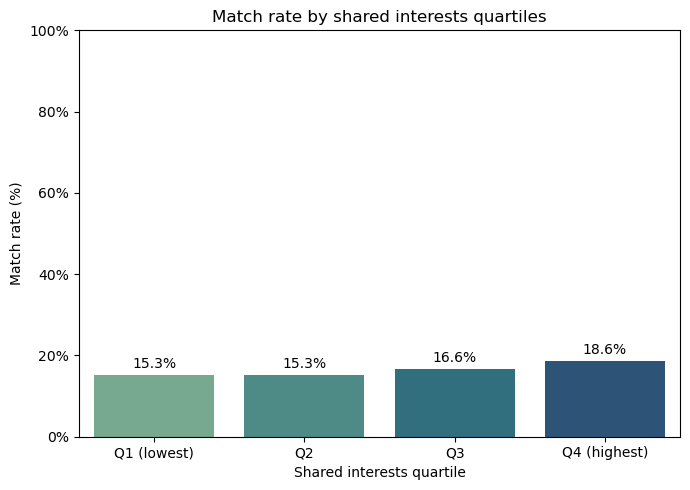

In [ ]:
# Quartiles of shared interests
df["int_quartile"] = pd.qcut(df["int_corr"], 4, labels=["Q1 (lowest)", "Q2", "Q3", "Q4 (highest)"])

rates_q = df.groupby("int_quartile", observed=False)["match"].mean().reset_index()

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=rates_q,
    x="int_quartile", y="match",
    hue="int_quartile", palette="crest", legend=False
)

ax.set_title("Match rate by shared interests quartiles")
ax.set_xlabel("Shared interests quartile")
ax.set_ylabel("Match rate (%)")
ax.set_ylim(0,1)   # full 0–100%
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Labels
for p in ax.patches:
    h = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, h + 0.01,
        f"{h*100:.1f}%",
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.show()


### Estimated matches VS Actual matches

This analysis checks how many participants actually answered the question “How many matches do you expect to get?” (match_es).

In [ ]:
# One row per participant for the estimate
participants = df.drop_duplicates("iid").copy()

n_total = participants["iid"].nunique()
n_with_estimate = participants["match_es"].notna().sum()

# Actual matches: sum of "match" per participant
actual = df.groupby("iid")["match"].sum().to_frame("actual_matches").reset_index()

# Merge estimates with actual matches (left join to keep all participants)
compare = participants[["iid", "match_es"]].merge(actual, on="iid", how="left")

n_in_scatter = compare["match_es"].notna().sum()  # number included in scatter (non-missing estimates)

print(f"Total participants: {n_total}")
print(f"Participants with a match estimate (non-missing match_es): {n_with_estimate}")
print(f"Participants included in scatter plot: {n_in_scatter}")
print(compare[["match_es","actual_matches"]].describe())


Total participants: 551
Participants with a match estimate (non-missing match_es): 479
Participants included in scatter plot: 479
         match_es  actual_matches
count  479.000000      551.000000
mean     3.026931        2.504537
std      2.346796        2.287412
min      0.000000        0.000000
25%      1.750000        1.000000
50%      2.500000        2.000000
75%      4.000000        4.000000
max     18.000000       14.000000


How to read:

Each bubble = one group of participants who gave the same answer (estimated X matches, actually got Y matches).

The size of the bubble = number of participants in that group.

The dashed red diagonal = perfect prediction (if estimates matched reality exactly).

Interpretation:

If bubbles fall below the line, participants overestimated their matches (they expected more than they got).

If bubbles fall above the line, they underestimated their matches.

The overall pattern shows whether people were generally optimistic, pessimistic, or realistic.

“We see that most participants are below the red line: they expected more matches than they actually got. This means participants tend to be optimistic about their chances.”

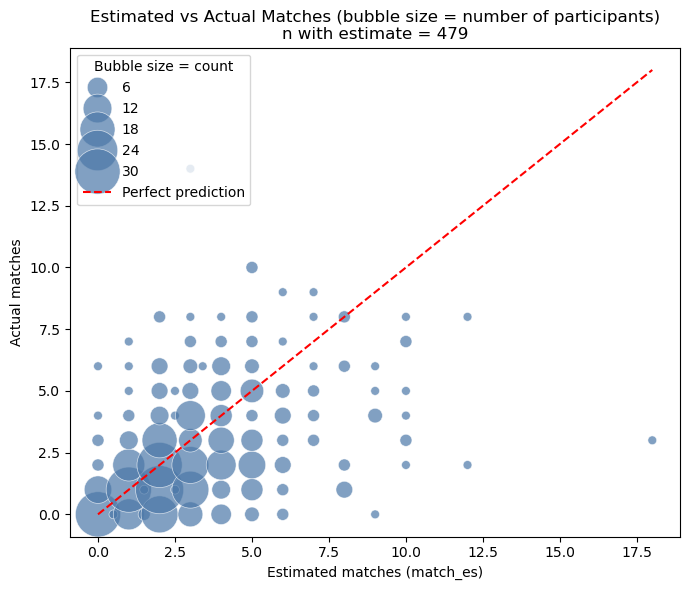

In [ ]:
# Keep only participants with a non-missing estimate
plot_df = compare.dropna(subset=["match_es"]).copy()

# Group by (estimate, actual) pairs and count frequency
freq = (
    plot_df
    .groupby(["match_es", "actual_matches"])
    .size()
    .reset_index(name="count")
)

# Bubble size scaling
size_scale = 30

plt.figure(figsize=(7,6))
ax = sns.scatterplot(
    data=freq,
    x="match_es", y="actual_matches",
    size="count", sizes=(40, 40*size_scale),
    color="#4c78a8", alpha=0.7,
    edgecolor="white", linewidth=0.5, legend=True
)

# Reference line (perfect prediction)
max_x = freq["match_es"].max()
max_y = freq["actual_matches"].max()
m = max(max_x, max_y)
plt.plot([0, m], [0, m], "--", color="red", label="Perfect prediction")

plt.title(f"Estimated vs Actual Matches (bubble size = number of participants)\n"
          f"n with estimate = {len(plot_df)}")
plt.xlabel("Estimated matches (match_es)")
plt.ylabel("Actual matches")
plt.legend(loc="upper left", title="Bubble size = count")
plt.tight_layout()
plt.show()


How to read:

Bars compare average estimated matches vs average actual matches by gender.

Numbers above bars give the exact values.

The difference between the two bars for each gender shows the “optimism gap.”

Interpretation:

If men estimate more matches than they actually receive, their bar for estimates will be higher than their actual matches bar.

The same logic applies to women.

This lets you compare not just individuals, but whether one gender tends to be more optimistic or realistic than the other.

“Both men and women tend to overestimate their matches, but men are slightly more optimistic on average than women.”

<Figure size 700x500 with 0 Axes>

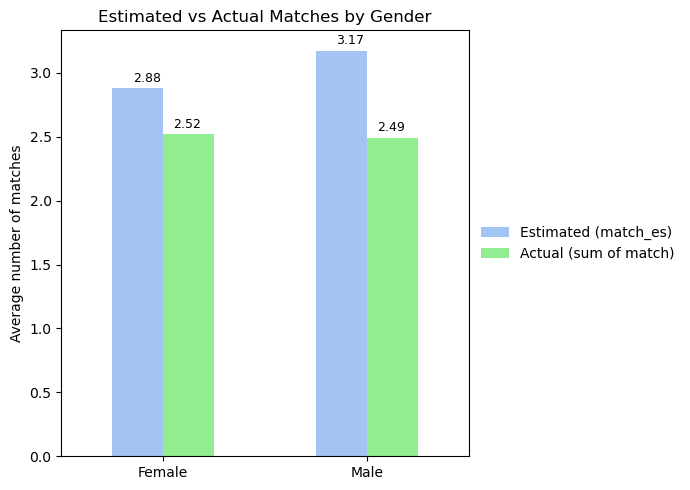

In [ ]:
# Barplot comparing mean estimated vs mean actual by gender
plt.figure(figsize=(7,5))
wide = summary.set_index("gender_label")[["mean_est","mean_act"]]
ax = wide.plot(kind="bar", rot=0, figsize=(7,5), color=["#a3c4f3", "#90ee90"])

plt.title("Estimated vs Actual Matches by Gender")
plt.ylabel("Average number of matches")
plt.xlabel("")

# Legend outside to the right
plt.legend(
    ["Estimated (match_es)", "Actual (sum of match)"],
    loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False
)

# Annotate mean values
for i, (est, act) in enumerate(wide.values):
    plt.text(i-0.15, est+0.05, f"{est:.2f}", fontsize=9)
    plt.text(i+0.05, act+0.05, f"{act:.2f}", fontsize=9)

plt.tight_layout()
plt.show()
